## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions
using LinearAlgebra

### Loading the banana dataset from OpenML

In [2]:
kernel = SqExponentialKernel()
x = range(0, 10, length=50)
K = kernelmatrix(kernel, x)
f = rand(MvNormal(K + 1e-8I)) # Sample a random GP
y = rand.(Bernoulli.(AGP.logistic.(f)))
y_sign = sign.(y .- 0.5)

50-element Vector{Float64}:
 -1.0
  1.0
 -1.0
 -1.0
  1.0
 -1.0
 -1.0
  1.0
 -1.0
 -1.0
  ⋮
  1.0
  1.0
  1.0
 -1.0
  1.0
 -1.0
 -1.0
 -1.0
 -1.0

### We create a function to visualize the data

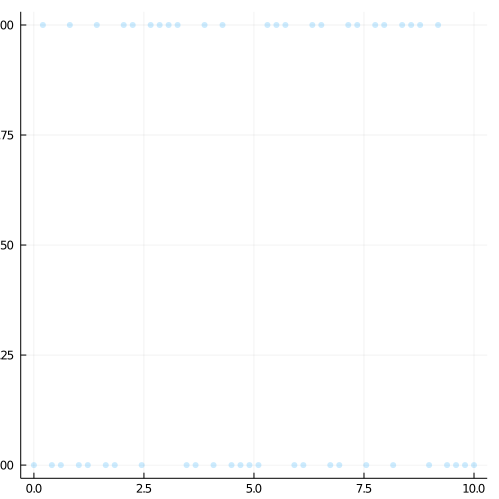

In [3]:
function plot_data(x, y; size=(300,500))
    Plots.scatter(x,
                y,
                alpha=0.2,
                markerstrokewidth=0.0,
                lab="",
                size=size
            )
end
plot_data(x, y; size = (500, 500))

### Run the variational gaussian process approximation

In [4]:
@info "Running full model"
mfull = VGP(x, y_sign,
            kernel,
            LogisticLikelihood(),
            AnalyticVI(),
            optimiser = false
            )
@time train!(mfull, 5)

┌ Info: Running full model
└ @ Main.##475 string:1
  0.611728 seconds (1.13 M allocations: 66.156 MiB, 99.27% compilation time)


### We can also create a sampling based model

In [5]:
@info "Sampling from model"
mmcmc = MCGP(x, y,
            kernel,
            LogisticLikelihood(),
            GibbsSampling(),
            optimiser = false
            )
m = mmcmc
@time samples = sample(mmcmc, 1000)

┌ Info: Sampling from model
└ @ Main.##475 string:1
Sampling with Gibbs Sampler   0%|                       |  ETA: N/A
Sampling with Gibbs Sampler   0%|▏                      |  ETA: 0:04:59
Sampling with Gibbs Sampler   1%|▎                      |  ETA: 0:02:32
Sampling with Gibbs Sampler   1%|▍                      |  ETA: 0:01:41
Sampling with Gibbs Sampler   2%|▍                      |  ETA: 0:01:15
Sampling with Gibbs Sampler   2%|▌                      |  ETA: 0:01:00
Sampling with Gibbs Sampler   3%|▋                      |  ETA: 0:00:50
Sampling with Gibbs Sampler   3%|▊                      |  ETA: 0:00:43
Sampling with Gibbs Sampler   4%|▉                      |  ETA: 0:00:37
Sampling with Gibbs Sampler   4%|█                      |  ETA: 0:00:33
Sampling with Gibbs Sampler   5%|█                      |  ETA: 0:00:29
Sampling with Gibbs Sampler   5%|█▏                     |  ETA: 0:00:27
Sampling with Gibbs Sampler   5%|█▎                     |  ETA: 0:00:24
Sampling with Gi

1000-element Vector{Vector{Vector{Float64}}}:
 [[-0.8855677048871058, -0.9857680431193778, -1.006921948738583, -0.9520265992071043, -0.7852274201763623, -0.6005905829615089, -0.364340991182656, -0.14843656320454526, 0.039975098760141145, 0.18317809694277382  …  0.20895403708099264, 0.06781990431532425, -0.060903914515086255, -0.2537860924266155, -0.3893200009285953, -0.4240738030976372, -0.3374686738180782, -0.15318495640132868, 0.09880187458413114, 0.30067888259523046]]
 [[-0.5783474783806661, -0.6978745810672562, -0.7744730814190539, -0.80579393475313, -0.7683469653574004, -0.6623347635305519, -0.4871041916189151, -0.25716042546964507, -0.03423833227659912, 0.17729687582026188  …  0.5746809906931812, 0.5800328070609041, 0.5195991723949199, 0.35416444737907693, 0.11470192325948649, -0.14597697062121479, -0.45840799321385284, -0.7430614135973824, -0.9756579165004757, -1.1483322725916771]]
 [[-0.6157041123093204, -0.29524555892465965, -0.06327539111916419, 0.05500639130610008, 0.0368568

### We can now visualize the results of both models

### We first plot the latent function f (truth, the VI estimate, the samples)

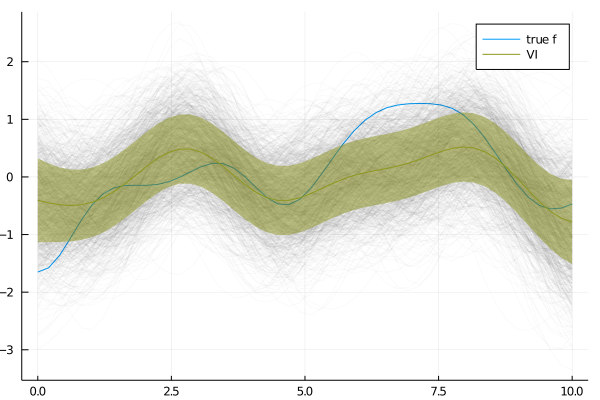

In [6]:
p1 = plot(x, f, label="true f")
plot!(x, samples, label="", color=:black, alpha=0.02, lab="")
plot!(x, mean(mfull[1]), ribbon=sqrt.(var(mfull[1])), label="VI")

### And we can also plot the predictions vs the data

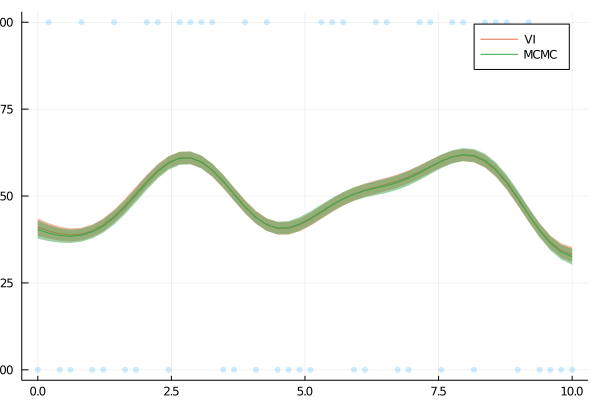

In [7]:
p2 = plot_data(x, y; size=(600,400))
μ_vi, σ_vi = proba_y(mfull, x)
plot!(x, μ_vi; ribbon=σ_vi, label="VI")
μ_mcmc, σ_mcmc = proba_y(mmcmc, x)
plot!(x, μ_mcmc; ribbon=σ_mcmc, label="MCMC")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*